<a href="https://colab.research.google.com/github/Phorutai/ICMA252/blob/main/Notebook_11_Correlation_and_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import modules as need
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**Exercise 1**

The data below shows the life expectancy for an individual born in the United States in certain years. The data of both variables is normal, and the significant level is set at 0.05. Perform the correlation test to prove if the year of birth has an impact on life expectancy.

Year of Birth:	1930,	1940,	1950,	1965,	1973,	1982,	1987,	1992,	2010

Life Expectancy:	59.7,	62.9,	70.2,	69.7,	71.4,	74.5,	75,	75.7,	78.7

H0:

H1:

In [ ]:
### Write code here ###
year = [1930, 1940, 1950, 1965, 1973, 1982, 1987, 1992, 2010]
life = [59.7, 62.9, 70.2, 69.7, 71.4, 74.5, 75, 75.7, 78.7]
result = stats.pearsonr(year, life)
result

PearsonRResult(statistic=0.9612611619245915, pvalue=3.6272611687865765e-05)

**Test result**

Correlation coefficient:

P-value:

Conclusion:


From Exercise 1, create a scatter plot to represent the correlation between the year of birth and life expectancy.

In [ ]:
### Write code here ###


**Exercise 2**

Suppose we have ranks of 8 students of B.Sc. in Statistics and Mathematics. On the basis of rank we would like to know that to what extent the knowledge of the student in Statistics and Mathematics is related. The significant level of the test is 0.05.

stat = [1, 2, 3, 4, 5, 6, 7, 8]

math = [2, 4, 1, 5, 3, 8, 7, 6]

H0:

H1:


In [ ]:
### write code here ###
stat = [1, 2, 3, 4, 5, 6, 7, 8]
math = [2, 4, 1, 5, 3, 8, 7, 6]
result = stats.spearmanr(stat, math)
result

SignificanceResult(statistic=0.7380952380952381, pvalue=0.03655276105286081)

**Test result**

Correlation coefficient:

P-value:

Conclusion:

From Exercise 2, create a scatter plot to represent the correlation between the rank in statistics and mathematics.

In [ ]:
### Write code here ###


**Exercise 3**

The data in a CSV file presents the number of calories and the number of grams of fat per 100 grams of products for a sample of 18 candy products. Investigate the relationship between fats and calories from 18 sample candy products, and build a simple linear regression model from the data.

data: https://raw.githubusercontent.com/Phorutai/deposited_csv_data/refs/heads/main/candy_fat_calories.csv

Then, use a model to predict the calories from the number of grams of fats from 5 homemade candies

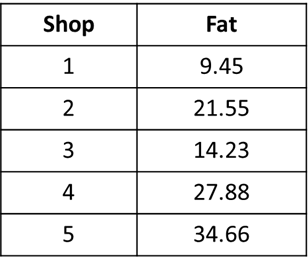


In [ ]:
# import models as need
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# read the dataframe
url = 'https://raw.githubusercontent.com/Phorutai/deposited_csv_data/refs/heads/main/candy_fat_calories.csv'
df = pd.read_csv(url)
df

,Products,Fats,Calories
0,3 Musketeers,12.75,436
1,Kit Kat,25.99,518
2,M&M Plain,21.13,492
3,M&M Peanut,26.13,515
4,Milky Way,17.23,456
5,Skitllers,4.37,405
6,Snickers,23.85,491
7,Starbrust,8.36,408
8,Twix,24.85,502
9,Mr.Goodbar,33.21,538


In [ ]:
"""
Do not split the data
"""
fat = np.array(df.loc[:, 'Fats']).reshape(-1, 1) # reshape to a 2D array
cal = df.loc[:, 'Calories']
# Build a model from the whole data set, x=Fats, y=Calories
model = LinearRegression()
model.fit(fat, cal)
# Get y-intercept, slope, and correlation coefficent
intercept = model.intercept_
slope = model.coef_
r_square = model.score(fat, cal)
print(f'intercept: {intercept}')
print(f'slope: {slope}')
print(f'r-square:{r_square}')
# Make a predcition of scores from input data of numbers of grams of fats
input_fat = np.array([9.45, 21.55, 14.23, 27.88, 34.66]).reshape(-1, 1)
pred_cal = model.predict(input_fat)
print(f'Predicted calories: {pred_cal}')
# Create a scatter plot to visualise the actual calories with a linear regression line of predicted calories
fig, ax = plt.subplots()
ax.scatter(fat, cal, label='Actual calories')
ax.plot(input_fat, pred_cal, color='red', label='Regression line')
ax.set(xlabel='Fats', ylabel='Calories')
plt.legend()
plt.show


In [ ]:
"""
Split the data to train and sets
Note: If you don't have any experince with matchine learning,
it would be better to come back to see this source code after you have learned about it :)
"""
from sklearn.model_selection import train_test_split
fat = np.array(df.loc[:, 'Fats']).reshape(-1, 1) # reshape to a 2D array
cal = df.loc[:, 'Calories']
# Split the data to trian set (70%) and test set (30%)
# x=Fats, y=Calories
X_train, X_test, y_train, y_test = train_test_split(fat, cal, test_size=0.3)
# Build a model from train data set
model = LinearRegression()
model.fit(X_train, y_train)
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')
print(f'r-square:{model.score(X_train, y_train)}')
# Predict scores based on numbers of hours from test set
y_pred = model.predict(X_test)
# Create an overlaying scatter plot to visualise the actual scores and predicted scores
fig, ax = plt.subplots()
ax.scatter(X_test, y_test, label='Actual calories')
ax.plot(X_test, y_pred, color='red', label='Predicted calories')
ax.set(xlabel='Fats', ylabel='Calories')
plt.legend()
plt.show

In [ ]:
import pandas as pd
file = 'https://raw.githubusercontent.com/Phorutai/deposited_csv_data/refs/heads/main/StudentPerformanceFactors_Numeric.csv'
df = pd.read_csv(file)
df

,Hours_Studied,Attendance_Score,Sleep_Hours,PreTest_Scores,Exam_Score
0,23,84,7,73,67
1,19,64,8,59,61
2,24,98,7,91,74
3,29,89,8,98,71
4,19,92,6,65,70
...,...,...,...,...,...
6602,25,69,7,76,68
6603,23,76,8,81,69
6604,20,90,6,65,68
6605,10,86,6,91,68
